# Support Vector Machine
[kleinml.svm](https://github.com/KazukiChiyo/kleinml/tree/master/svm)

## Linear SVM
Linear Support Vector Classification. Similar to `svm.SVC(kernel="linear")` but implemented with stochastic gradient descent.
```
svm.LinearSVC(C=1.0, shuffle=True, max_iter=1000, tol=0.0001, batch_size=16, learning_rate="optimal", eta0=0.01)
```

### Parameters
```
C: float, optional
    Penalty parameter C of the error term.
shuffle: boolean
    Whether or not the training data should be shuffled after each epoch.
max_iter: int, optional
    Maximum number of iterations for gradient descent.
tol: float
    Precision of the solution.
batch_size: int
    Size of the batch at each iteration for mini-batch SGD.
learning_rate: string, optional
    The learning rate schedule:
    "constant": eta = eta0
    "optimal": eta = C/t
eta0: double, optional
    The initial learning rate.
```

### Methods
`fit(X, y)`: Fit the model according to the given training data.<br>
`predict(X)`: Predict class labels for samples in X.<br>

### Example

Confusion matrix
[[ 4  0  0]
 [ 1 17  0]
 [ 0  5  3]]
Accuracy 0.8


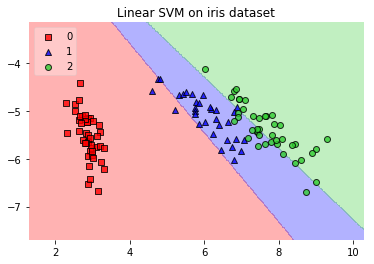

In [26]:
import sys
sys.path.append('../')
from svm.LinearSVC import LinearSVC
from decomposition.PCA import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import util

train_x, train_y, test_x, test_y = util.load_iris()
pca = PCA(n_components=2)
pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)
model = LinearSVC(batch_size=1, C=0.1)
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))
plot_decision_regions(train_x, train_y, clf=model, legend=2)
plt.title('Linear SVM on iris dataset')
plt.show()

## Kernel SVM
C-Support vector classification using Platt's SMO algorithm.
```
svm.SVC(C=1.0, kernel="rbf", degree=3, gamma="auto", coef0=0.0, tol=0.01, max_iter=1000, decision_function_shape="ovr")
```

### Parameters
```
C: float, optional
    Penalty parameter C of the error term.
kernel: string, optional
    Specifies the kernel type to be used in the algorithm:
    "linear": linear kernel <x, x'>
    "rbf": rbf kernel exp(-gamma|x-x'|^2)
    "poly": polynominal kernel (gamma<x, x'>+r)^d
    "sigmoid": sigmoid kernel tanh((gamma<x, x'>+r)^d)
degree: int, optional
    Degree of the polynomial kernel ("poly").
gamma: int, optional
    Kernel coefficient for "rbf", "poly" and "sigmoid".
coef0: float, optional
    Independent term in "poly" and "sigmoid".
tol: float
    Precision of the solution.
max_iter: int, optional
    Hard limit on iterations within solver.
decision_function_shape: string
    Whether to return a one-vs-rest ("ovr") decision function or one-vs-one ("ovo").
```

### Attributes
```
idx: array
    Indices of support vectors.
sv_x: array
    Support vectors.
sv_y: array
    Labels of support vectors.
```

### Methods
`fit(X, y)`: Fit the model according to the given training data.<br>
`predict(X)`: Predict class labels for samples in X.<br>

### Example

Confusion matrix
[[9 0]
 [2 9]]
Accuracy 0.9
Number of support vectors 37


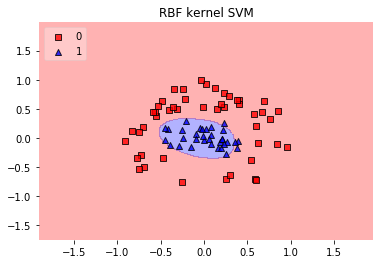

In [6]:
import sys
sys.path.append('../')
import numpy as np
from svm.SVC import SVC
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import util

train_x, train_y, test_x, test_y = util.load_rbf()
model = SVC(kernel="rbf", gamma=5, decision_function_shape="ovo")
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))
print("Number of support vectors", model.sv_x.shape[0])
plot_decision_regions(train_x, train_y, clf=model, legend=2)
plt.title('RBF kernel SVM')
plt.show()

Confusion matrix
[[12  0  0]
 [ 1  7  0]
 [ 0  0 10]]
Accuracy 0.9666666666666667
Number of support vectors 49


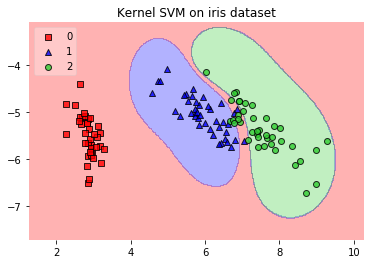

In [109]:
import sys
sys.path.append('../')
from svm.SVC import SVC
from decomposition.PCA import PCA
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
import util

train_x, train_y, test_x, test_y = util.load_iris()
pca = PCA(n_components=2)
pca.fit(train_x)
train_x = pca.transform(train_x)
test_x = pca.transform(test_x)
model = SVC(kernel="rbf", gamma=0.8)
model.fit(train_x, train_y)
pred = model.predict(test_x)
cm = util.confusion_matrix(test_y, pred)
print("Confusion matrix")
print(cm)
print("Accuracy", util.accuracy(cm))
print("Number of support vectors", model.sv_x.shape[0])
plot_decision_regions(train_x, train_y, clf=model, legend=2)
plt.title('Kernel SVM on iris dataset')
plt.show()